In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitudes combinations.
lats = np.random.uniform(low= -90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use print() function to apply the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-53.90287365609414 115.46157489764107
-46.12664400756394 108.82174126802954
88.8568126935672 -40.20336924598354
-65.18184430415249 -101.96623604599289
16.792840598894728 -139.28532593214888
52.4867708590605 -137.0995847056081
-44.94303809223445 -175.59207252522404
8.526063557508891 -43.96680175920025
14.778953269583482 -71.81000532741744
52.99020201095777 162.80924280351286
56.1212063429513 -39.477609776763785
65.15482952302315 -87.39646681677232
-86.00975737905722 29.82905349349693
52.405175264468824 -113.3737809026725
-9.586822915836464 -153.72573900969655
10.998784169929777 -169.9104304096424
-57.595453342489165 -110.52015491415324
14.504224965592883 55.84279266434933
64.97883642884932 -120.07421648346542
-48.58731838760096 13.889285152177024
-33.28861529654549 -168.68621854757515
-23.322804994175925 -83.17643000287084
-61.775157371359526 -29.553456333543437
29.957652313610282 48.500492396069376
-25.64010157166686 99.45357056388997
89.33027240624534 14.293995217264666
88.04038364958

In [5]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [26]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combinations.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [7]:
# import the requests library
import requests

# import the API key
from config import weather_api_key


In [8]:
# Starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | saint-georges
Processing Record 9 of Set 1 | oranjestad
Processing Record 10 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | ponoka
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | hay river
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | marcona
City not found. Skipping..

Processing Record 35 of Set 4 | suez
Processing Record 36 of Set 4 | jaltepec
Processing Record 37 of Set 4 | nioro
Processing Record 38 of Set 4 | harper
Processing Record 39 of Set 4 | geraldton
Processing Record 40 of Set 4 | toungoo
City not found. Skipping...
Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | bathsheba
Processing Record 43 of Set 4 | katangli
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | mana
Processing Record 47 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | college
Processing Record 50 of Set 4 | noyabrsk
Processing Record 1 of Set 5 | halalo
City not found. Skipping...
Processing Record 2 of Set 5 | riyadh
Processing Record 3 of Set 5 | aberdeen
Processing Record 4 of Set 5 | ballina
Processing Record 5 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 6 of Set 5 | morondava
Proces

Processing Record 20 of Set 8 | airai
Processing Record 21 of Set 8 | sabang
Processing Record 22 of Set 8 | haileybury
Processing Record 23 of Set 8 | macon
Processing Record 24 of Set 8 | eyl
Processing Record 25 of Set 8 | mantua
Processing Record 26 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 27 of Set 8 | yuci
Processing Record 28 of Set 8 | paraiso
Processing Record 29 of Set 8 | san ignacio
Processing Record 30 of Set 8 | guadalupe y calvo
Processing Record 31 of Set 8 | porto velho
Processing Record 32 of Set 8 | mbanza-ngungu
Processing Record 33 of Set 8 | raudeberg
Processing Record 34 of Set 8 | garissa
Processing Record 35 of Set 8 | karpogory
Processing Record 36 of Set 8 | flinders
Processing Record 37 of Set 8 | oleksandrivka
Processing Record 38 of Set 8 | aflu
City not found. Skipping...
Processing Record 39 of Set 8 | torbat-e jam
Processing Record 40 of Set 8 | springfield
Processing Record 41 of Set 8 | bela
Processing Record 42 of Set 8 | todo

Processing Record 12 of Set 12 | bajo baudo
City not found. Skipping...
Processing Record 13 of Set 12 | guilin
Processing Record 14 of Set 12 | kristiinankaupunki
Processing Record 15 of Set 12 | aklavik
Processing Record 16 of Set 12 | rawson
Processing Record 17 of Set 12 | namibe
Processing Record 18 of Set 12 | pangnirtung
Processing Record 19 of Set 12 | colares
Processing Record 20 of Set 12 | birigui
Processing Record 21 of Set 12 | mamlyutka
Processing Record 22 of Set 12 | broken hill
Processing Record 23 of Set 12 | lerwick
Processing Record 24 of Set 12 | tual
Processing Record 25 of Set 12 | flin flon
Processing Record 26 of Set 12 | lozova
Processing Record 27 of Set 12 | dipkarpaz
City not found. Skipping...
Processing Record 28 of Set 12 | mozelos
Processing Record 29 of Set 12 | port macquarie
Processing Record 30 of Set 12 | srandakan
Processing Record 31 of Set 12 | pitimbu
Processing Record 32 of Set 12 | mpika
Processing Record 33 of Set 12 | beira
Processing Recor

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,51.39,43,100,5.99,US,2022-05-07 04:10:49
1,Busselton,-33.6500,115.3333,66.67,50,1,9.15,AU,2022-05-07 04:14:52
2,Ilulissat,69.2167,-51.1000,3.99,83,11,7.05,GL,2022-05-07 04:12:44
3,Punta Arenas,-53.1500,-70.9167,46.51,81,100,5.75,CL,2022-05-07 04:14:53
4,Hilo,19.7297,-155.0900,82.27,85,100,4.61,US,2022-05-07 04:14:53
5,Sitka,57.0531,-135.3300,46.29,66,40,5.75,US,2022-05-07 04:13:08
6,Vaini,-21.2000,-175.2000,75.36,88,75,9.22,TO,2022-05-07 04:10:28
7,Saint-Georges,12.0564,-61.7485,78.73,78,100,12.26,GD,2022-05-07 04:11:37
8,Oranjestad,12.5240,-70.0270,79.66,87,100,19.73,AW,2022-05-07 04:10:00
9,Nanortalik,60.1432,-45.2371,34.59,98,100,3.40,GL,2022-05-07 04:14:53


In [22]:
new_city_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_city_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-05-07 04:10:49,42.6001,-73.9662,51.39,43,100,5.99
1,Busselton,AU,2022-05-07 04:14:52,-33.6500,115.3333,66.67,50,1,9.15
2,Ilulissat,GL,2022-05-07 04:12:44,69.2167,-51.1000,3.99,83,11,7.05
3,Punta Arenas,CL,2022-05-07 04:14:53,-53.1500,-70.9167,46.51,81,100,5.75
4,Hilo,US,2022-05-07 04:14:53,19.7297,-155.0900,82.27,85,100,4.61
5,Sitka,US,2022-05-07 04:13:08,57.0531,-135.3300,46.29,66,40,5.75
6,Vaini,TO,2022-05-07 04:10:28,-21.2000,-175.2000,75.36,88,75,9.22
7,Saint-Georges,GD,2022-05-07 04:11:37,12.0564,-61.7485,78.73,78,100,12.26
8,Oranjestad,AW,2022-05-07 04:10:00,12.5240,-70.0270,79.66,87,100,19.73
9,Nanortalik,GL,2022-05-07 04:14:53,60.1432,-45.2371,34.59,98,100,3.40


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

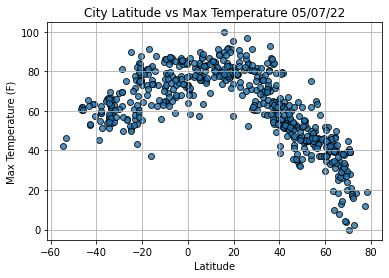

In [29]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha = 0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# SHow plot
plt.show()

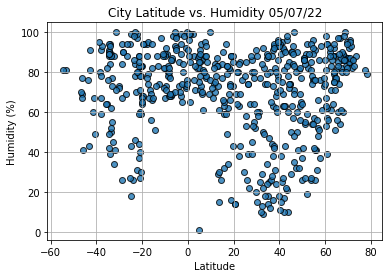

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

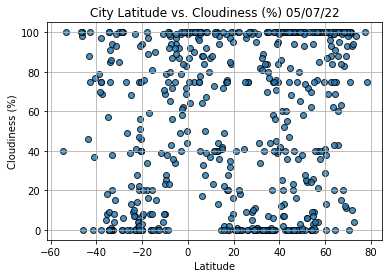

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

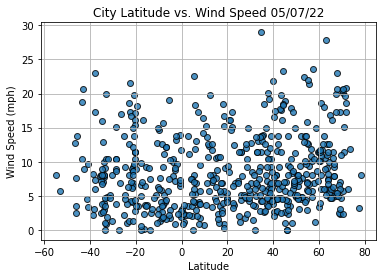

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()